In [1]:
import pandas as pd
df = pd.read_csv('./dataset1.1.csv', sep=";") # almacenamiento en datagrama
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,"95,12",18.0,unknowns,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,"87,96",39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,"110,89",17.6,unknowns,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,"69,04",35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,"161,28",19.1,unknowns,0


In [2]:
dataset = df.values
X = dataset[:,0:11] # Atributos de entrada
Y = dataset[:,11] # Etiquetas
#Con relacion al sexo
#0 corresponde a Male
#1 corresponde a Female 
X[:,1] = [0 if value=="Male" else value for value in X[:,1]]
X[:,1] = [1 if value=="Female" else value for value in X[:,1]]
X[:,1] = [2 if value=="Other" else value for value in X[:,1]]
 
#Con relacion a si es casado
#0 corresponde a NO
#1 corresponde a YES 
X[:,5] = [0 if value=="No" else value for value in X[:,5]]
X[:,5] = [1 if value=="Yes" else value for value in X[:,5]]

#Con relacion al tipo de trabajo
#0 corresponde a Never_worked
#1 corresponde a children
#2 corresponde a Govt_job
#3 corresponde a Private
#4 corresponde a Self-employed
X[:,6] = [0 if value=="Never_worked" else value for value in X[:,6]]
X[:,6] = [1 if value=="children" else value for value in X[:,6]]
X[:,6] = [2 if value=="Govt_job" else value for value in X[:,6]]
X[:,6] = [3 if value=="Private" else value for value in X[:,6]]
X[:,6] = [4 if value=="Self-employed" else value for value in X[:,6]]

#Con relacion a el lugar en que vive
#0 corresponde a Urban
#1 corresponde a Rural
X[:,7] = [0 if value=="Urban" else value for value in X[:,7]]
X[:,7] = [1 if value=="Rural" else value for value in X[:,7]]

#Con relacion su estado de fumador
#0 corresponde a never smoked
#1 corresponde a smokes
#2 corresponde a unknowns
#3 corresponde a formerly smoked
X[:,10] = [0 if value=="never smoked" else value for value in X[:,10]]
X[:,10] = [1 if value=="smokes" else value for value in X[:,10]]
X[:,10] = [2 if value=="unknowns" else value for value in X[:,10]]
X[:,10] = [3 if value=="formerly smoked" else value for value in X[:,10]]

#pase los datos con "," a "." para que python haga lectura de los datos.
X[:,8]  = [float(s.replace(',', '.')) for s in X[:,8]]
print (X[:,6])

[1 3 3 ... 3 1 2]


In [3]:
# Normalización de datos
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
print(X_scale)

[[0.42044364 0.         0.03564453 ... 0.16996399 0.09028571 0.66666667]
 [0.41768803 0.         0.70703125 ... 0.13963143 0.33257143 0.        ]
 [0.22650873 0.5        0.09667969 ... 0.23677187 0.08571429 0.66666667]
 ...
 [0.3033369  0.5        0.21875    ... 0.11798348 0.42057143 0.66666667]
 [0.19438732 0.5        0.15771484 ... 0.20368566 0.09714286 0.66666667]
 [0.61251405 0.5        0.53613281 ... 0.12827791 0.184      0.66666667]]


In [4]:
# Separación de datos de entrenamiento y validación
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.3)
print("el largo de X_train es", np.shape(X_train), "y el largo de X_test es", np.shape(X_test))

el largo de X_train es (30394, 11) y el largo de X_test es (13027, 11)


In [5]:
# Construyendo la red
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(11,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
Y_train.shape

(30394,)

In [6]:
# Entrenamiento
Y_train = Y_train.astype('float64')
Y_test = Y_test.astype('float64')
print(type(X_train[0][0]), type(Y_train[20]))
hist = model.fit(X_train, Y_train, batch_size=32, epochs=25, validation_data=(X_test, Y_test))

<class 'numpy.float64'> <class 'numpy.float64'>
Epoch 1/25
950/950 [==============================] - 2s 1ms/step - loss: 0.1458 - accuracy: 0.9788 - val_loss: 0.0902 - val_accuracy: 0.9843
Epoch 2/25
950/950 [==============================] - 1s 876us/step - loss: 0.0866 - accuracy: 0.9846 - val_loss: 0.0868 - val_accuracy: 0.9843
Epoch 3/25
950/950 [==============================] - 1s 852us/step - loss: 0.0837 - accuracy: 0.9846 - val_loss: 0.0842 - val_accuracy: 0.9843
Epoch 4/25
950/950 [==============================] - 1s 829us/step - loss: 0.0813 - accuracy: 0.9846 - val_loss: 0.0820 - val_accuracy: 0.9843
Epoch 5/25
950/950 [==============================] - 1s 821us/step - loss: 0.0793 - accuracy: 0.9846 - val_loss: 0.0800 - val_accuracy: 0.9843
Epoch 6/25
950/950 [==============================] - 1s 843us/step - loss: 0.0776 - accuracy: 0.9846 - val_loss: 0.0783 - val_accuracy: 0.9843
Epoch 7/25
950/950 [==============================] - 1s 863us/step - loss: 0.0760 - accur

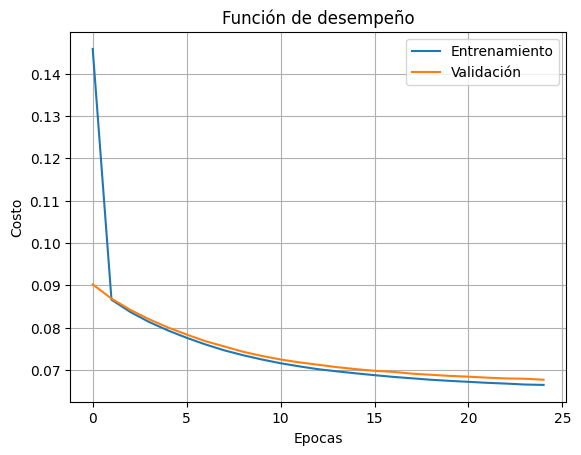

In [7]:
# Visualización de costo
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Función de desempeño')
plt.ylabel('Costo')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.grid(True)
plt.show()

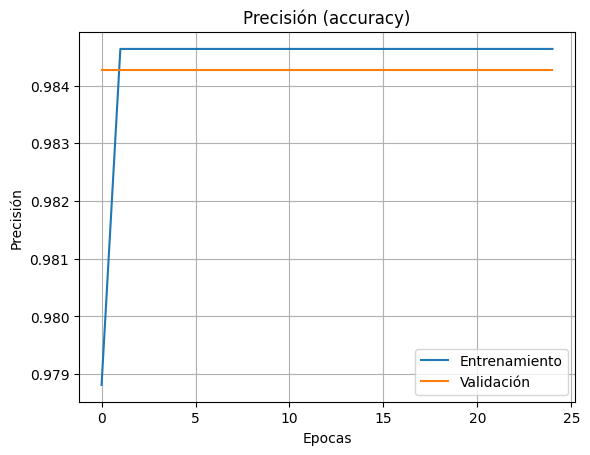

In [8]:
# Visualización de precisión

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Precisión (accuracy)')
plt.ylabel('Precisión')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Validación'], loc='lower right')
plt.grid(True)
plt.show()

In [9]:
# Ejemplo de sobreajuste

model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(11,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
950/950 [==============================] - 11s 11ms/step - loss: 0.1225 - accuracy: 0.9846 - val_loss: 0.0880 - val_accuracy: 0.9843
Epoch 2/100
950/950 [==============================] - 11s 11ms/step - loss: 0.0839 - accuracy: 0.9846 - val_loss: 0.0839 - val_accuracy: 0.9843
Epoch 3/100
950/950 [==============================] - 10s 11ms/step - loss: 0.0803 - accuracy: 0.9846 - val_loss: 0.0803 - val_accuracy: 0.9843
Epoch 4/100
950/950 [==============================] - 11s 11ms/step - loss: 0.0773 - accuracy: 0.9846 - val_loss: 0.0774 - val_accuracy: 0.9843
Epoch 5/100
950/950 [==============================] - 11s 11ms/step - loss: 0.0747 - accuracy: 0.9846 - val_loss: 0.0749 - val_accuracy: 0.9843
Epoch 6/100
950/950 [==============================] - 11s 11ms/step - loss: 0.0725 - accuracy: 0.9846 - val_loss: 0.0729 - val_accuracy: 0.9843
Epoch 7/100
950/950 [==============================] - 11s 11ms/step - loss: 0.0708 - accuracy: 0.9846 - val_loss: 0.0712 - val_ac

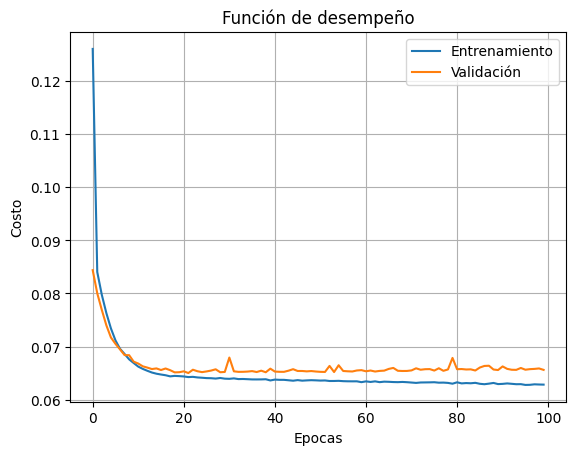

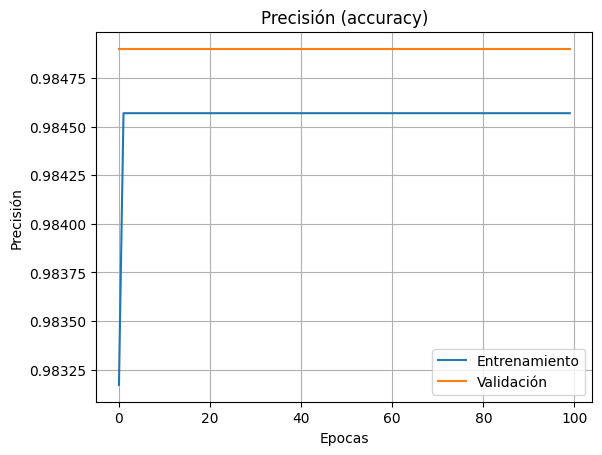

In [31]:
# Visualización del sobreajuste
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Función de desempeño')
plt.ylabel('Costo')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.grid(True)
plt.show()

plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Precisión (accuracy)')
plt.ylabel('Precisión')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Validación'], loc='lower right')
plt.grid(True)
plt.show()

In [32]:
# Abordando el sobreajuste
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(11,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_3.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
918/918 [==============================] - 42s 44ms/step - loss: 25.4591 - accuracy: 0.9841 - val_loss: 21.0501 - val_accuracy: 0.9849
Epoch 2/100
918/918 [==============================] - 39s 42ms/step - loss: 17.6432 - accuracy: 0.9846 - val_loss: 14.6144 - val_accuracy: 0.9849
Epoch 3/100
918/918 [==============================] - 41s 45ms/step - loss: 12.2552 - accuracy: 0.9846 - val_loss: 10.1567 - val_accuracy: 0.9849
Epoch 4/100
918/918 [==============================] - 40s 43ms/step - loss: 8.5229 - accuracy: 0.9846 - val_loss: 7.0687 - val_accuracy: 0.9849
Epoch 5/100
918/918 [==============================] - 40s 43ms/step - loss: 5.9372 - accuracy: 0.9846 - val_loss: 4.9292 - val_accuracy: 0.9849
Epoch 6/100
918/918 [==============================] - 38s 42ms/step - loss: 4.1460 - accuracy: 0.9846 - val_loss: 3.4466 - val_accuracy: 0.9849
Epoch 7/100
918/918 [==============================] - 40s 44ms/step - loss: 2.9040 - accuracy: 0.9846 - val_loss: 2.4191 - 

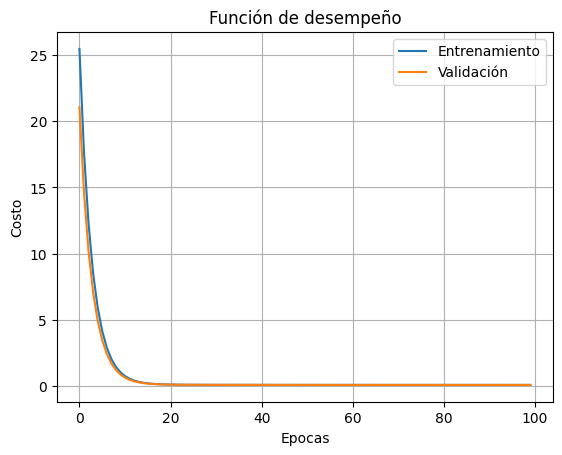

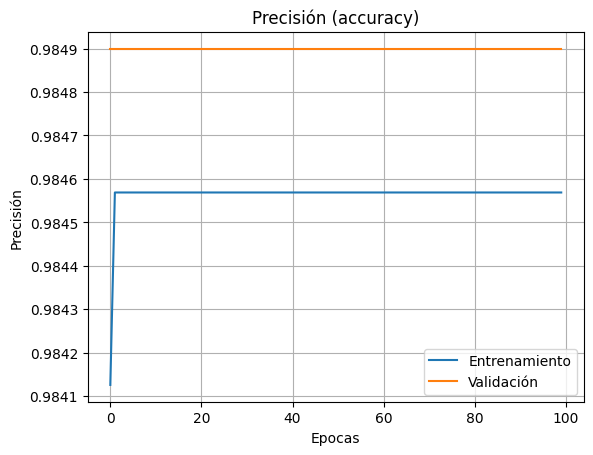

In [33]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Función de desempeño')
plt.ylabel('Costo')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.grid(True)
plt.show()

plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Precisión (accuracy)')
plt.ylabel('Precisión')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Validación'], loc='lower right')
plt.grid(True)
plt.show()

In [48]:
# Abordando el sobreajuste
from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(100, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01), input_shape=(11,)),
    Dropout(0.3),
    Dense(400, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1600, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(2800, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1600, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(800, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(200, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_3.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
Y_train = Y_train.astype('float64')
Y_test = Y_test.astype('float64')
hist_3 = model_3.fit(X_train, Y_train, batch_size=32, epochs=25, validation_data=(X_test, Y_test))

Epoch 1/25
918/918 [==============================] - 152s 164ms/step - loss: 52.6599 - accuracy: 0.9827 - val_loss: 43.5731 - val_accuracy: 0.9849
Epoch 2/25
918/918 [==============================] - 135s 147ms/step - loss: 36.4956 - accuracy: 0.9846 - val_loss: 30.2054 - val_accuracy: 0.9849
Epoch 3/25
918/918 [==============================] - 130s 142ms/step - loss: 25.3038 - accuracy: 0.9846 - val_loss: 20.9465 - val_accuracy: 0.9849
Epoch 4/25
918/918 [==============================] - 133s 145ms/step - loss: 17.5520 - accuracy: 0.9846 - val_loss: 14.5333 - val_accuracy: 0.9849
Epoch 5/25
918/918 [==============================] - 124s 136ms/step - loss: 12.1823 - accuracy: 0.9846 - val_loss: 10.0916 - val_accuracy: 0.9849
Epoch 6/25
918/918 [==============================] - 112s 122ms/step - loss: 8.4636 - accuracy: 0.9846 - val_loss: 7.0147 - val_accuracy: 0.9849
Epoch 7/25
918/918 [==============================] - 111s 121ms/step - loss: 5.8876 - accuracy: 0.9846 - val_loss

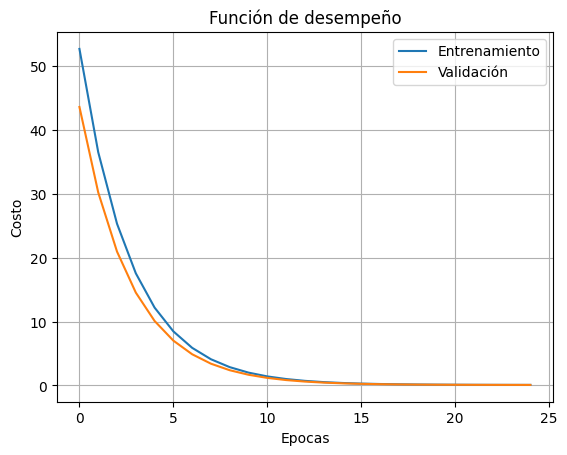

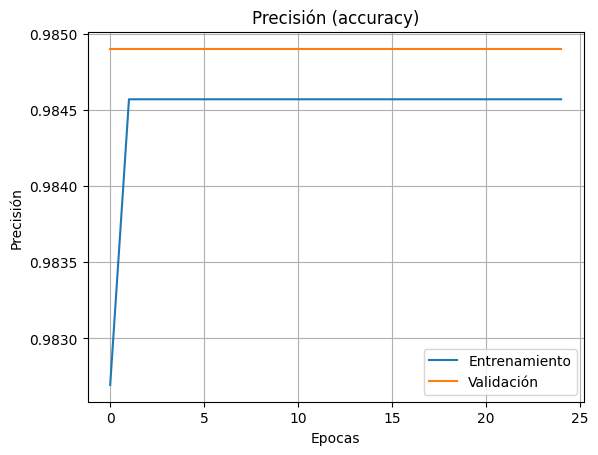

In [49]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Función de desempeño')
plt.ylabel('Costo')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.grid(True)
plt.show()

plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Precisión (accuracy)')
plt.ylabel('Precisión')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Validación'], loc='lower right')
plt.grid(True)
plt.show()